In [1]:
import pandas as pd
import numpy as np

try:
    df = pd.read_csv('Mall_Customers.csv')
    print("Successfully loaded 'Mall_Customers.csv'.")
except FileNotFoundError:
    print("Mall_Customers.csv not found. Creating a dummy DataFrame for demonstration.")
    data = {
        'CustomerID': range(1, 11),
        'Gender': ['Male', 'Male', 'Female', 'Female', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male'],
        'Age': [19, 21, 20, 23, 31, 22, 35, 23, 64, 30],
        'Annual Income (k$)': [15, 15, 16, 16, 17, 17, 18, 18, 19, 19],
        'Spending Score (1-100)': [39, 81, 6, 77, 40, 76, 6, 94, 3, 72]
    }
    df = pd.DataFrame(data)
    print("Dummy DataFrame created.")

print("\n--- First 5 rows of the dataset ---")
print(df.head())

print("\n--- Dataset Information (Columns, Non-Null Counts, Data Types) ---")
df.info()

print("\n--- Descriptive Statistics for Numerical Columns ---")
print(df.describe())

print("\n--- Check for Missing Values ---")
print(df.isnull().sum())

print("\n--- Confirming relevant columns for clustering ---")
required_columns = ['Annual Income (k$)', 'Spending Score (1-100)']
for col in required_columns:
    if col in df.columns:
        print(f"Column '{col}' found and ready for use.")
    else:
        print(f"Error: Column '{col}' not found in the dataset. Please check the column name.")

print("\nData loaded and initially explored.")
print("You now have a basic understanding of your dataset's structure and cleanliness.")

Successfully loaded 'Mall_Customers.csv'.

--- First 5 rows of the dataset ---
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

--- Dataset Information (Columns, Non-Null Counts, Data Types) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spendi

DataFrame 'df' reloaded for operations.

--- Selected features for clustering (first 5 rows) ---
   Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40
Shape of selected features: (200, 2)

--- Scaled features (first 5 rows) ---
   Annual Income (k$)  Spending Score (1-100)
0           -1.738999               -0.434801
1           -1.738999                1.195704
2           -1.700830               -1.715913
3           -1.700830                1.040418
4           -1.662660               -0.395980
Shape of scaled features: (200, 2)

--- Descriptive Statistics for Scaled Features ---
       Annual Income (k$)  Spending Score (1-100)
count        2.000000e+02            2.000000e+02
mean        -2.131628e-16           -1.465494e-16
std          1.002509e+00            

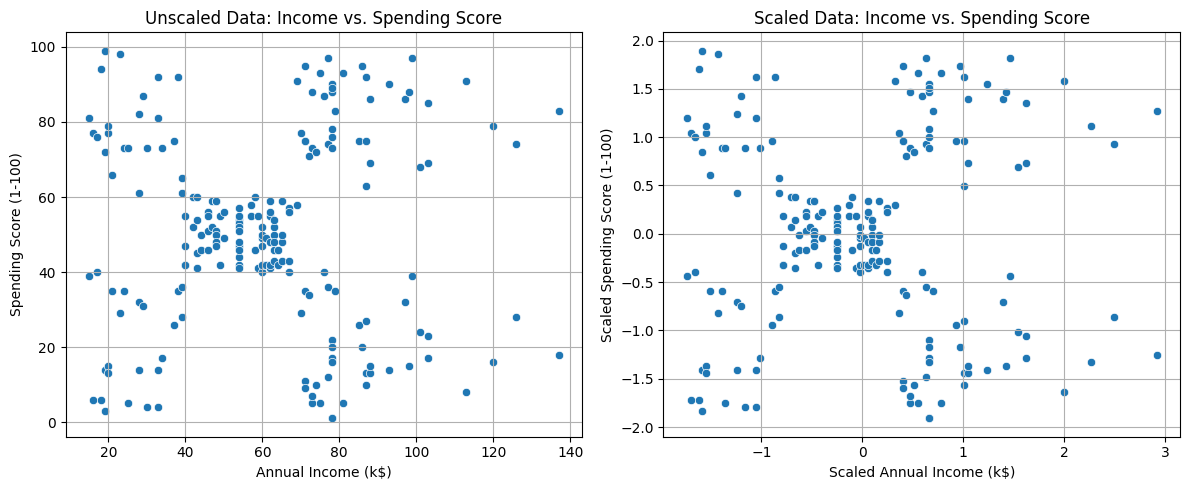


Data selected, scaled, and visualized.
You now have prepared data ready for clustering algorithms.


In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df = pd.read_csv('Mall_Customers.csv')
    print("DataFrame 'df' reloaded for operations.")
except FileNotFoundError:
    print("Mall_Customers.csv not found. Please ensure the file is in the correct directory.")
    exit()

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

print("\n--- Selected features for clustering (first 5 rows) ---")
print(X.head())
print(f"Shape of selected features: {X.shape}")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("\n--- Scaled features (first 5 rows) ---")
print(X_scaled_df.head())
print(f"Shape of scaled features: {X_scaled_df.shape}")

print("\n--- Descriptive Statistics for Scaled Features ---")
print(X_scaled_df.describe())

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=X)
plt.title('Unscaled Data: Income vs. Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)

plt.subplot(1, 2, 2)
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=X_scaled_df)
plt.title('Scaled Data: Income vs. Spending Score')
plt.xlabel('Scaled Annual Income (k$)')
plt.ylabel('Scaled Spending Score (1-100)')
plt.grid(True)

plt.tight_layout()
plt.show()

print("\nData selected, scaled, and visualized.")
print("You now have prepared data ready for clustering algorithms.")


DataFrame 'df' and 'X_scaled_df' reloaded/prepared for operations.

--- SSE values for different k ---
k=1: SSE=400.00
k=2: SSE=269.69
k=3: SSE=157.70
k=4: SSE=108.92
k=5: SSE=65.57
k=6: SSE=55.06
k=7: SSE=44.86
k=8: SSE=37.23
k=9: SSE=32.39
k=10: SSE=29.98


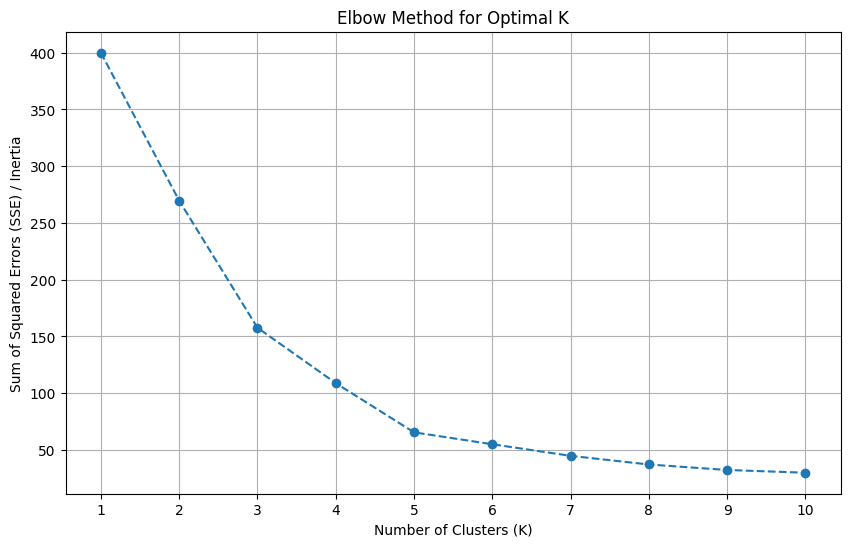


Elbow Method applied and plotted.
Analyze the plot to identify the 'elbow' point, which suggests the optimal K for clustering.


In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df = pd.read_csv('Mall_Customers.csv')
    scaler = StandardScaler()
    X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
    X_scaled_df = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
    print("DataFrame 'df' and 'X_scaled_df' reloaded/prepared for operations.")
except FileNotFoundError:
    print("Mall_Customers.csv not found. Please ensure the file is in the correct directory.")
    exit()

sse = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled_df)
    sse.append(kmeans.inertia_)

print("\n--- SSE values for different k ---")
for k_val, inertia_val in zip(k_range, sse):
    print(f"k={k_val}: SSE={inertia_val:.2f}")

plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE) / Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

print("\nElbow Method applied and plotted.")
print("Analyze the plot to identify the 'elbow' point, which suggests the optimal K for clustering.")


In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df = pd.read_csv('Mall_Customers.csv')
    scaler = StandardScaler()
    X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
    X_scaled_df = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
    print("DataFrame 'df' and 'X_scaled_df' reloaded/prepared for operations.")
except FileNotFoundError:
    print("Mall_Customers.csv not found. Please ensure the file is in the correct directory.")
    exit()

optimal_k = 5

kmeans_model = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)

kmeans_model.fit(X_scaled_df)

print(f"\nK-Means model trained with {optimal_k} clusters.")

cluster_labels = kmeans_model.labels_

df['Cluster'] = cluster_labels

print("\n--- First 10 rows of DataFrame with assigned Cluster labels ---")
print(df.head(10))

print("\n--- Distribution of customers per cluster ---")
print(df['Cluster'].value_counts().sort_index())

cluster_centers_scaled = kmeans_model.cluster_centers_
print("\n--- Cluster Centers (Scaled) ---")
print(cluster_centers_scaled)

cluster_centers_original_scale = scaler.inverse_transform(cluster_centers_scaled)
print("\n--- Cluster Centers (Original Scale) ---")
cluster_centers_df = pd.DataFrame(cluster_centers_original_scale, columns=X.columns)
cluster_centers_df.index.name = 'Cluster ID'
print(cluster_centers_df)


print("\nK-Means model trained, clusters assigned, and centers inspected.")
print("You now have your customer data segmented into 5 distinct clusters.")


DataFrame 'df' and 'X_scaled_df' reloaded/prepared for operations.

K-Means model trained with 5 clusters.

--- First 10 rows of DataFrame with assigned Cluster labels ---
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   
5           6  Female   22                  17                      76   
6           7  Female   35                  18                       6   
7           8  Female   23                  18                      94   
8           9    Male   64                  19                       3   
9          10  Female   30                  19                      72   

   Cluster  


DataFrame 'df' with clusters and original scale centers reloaded/prepared for operations.


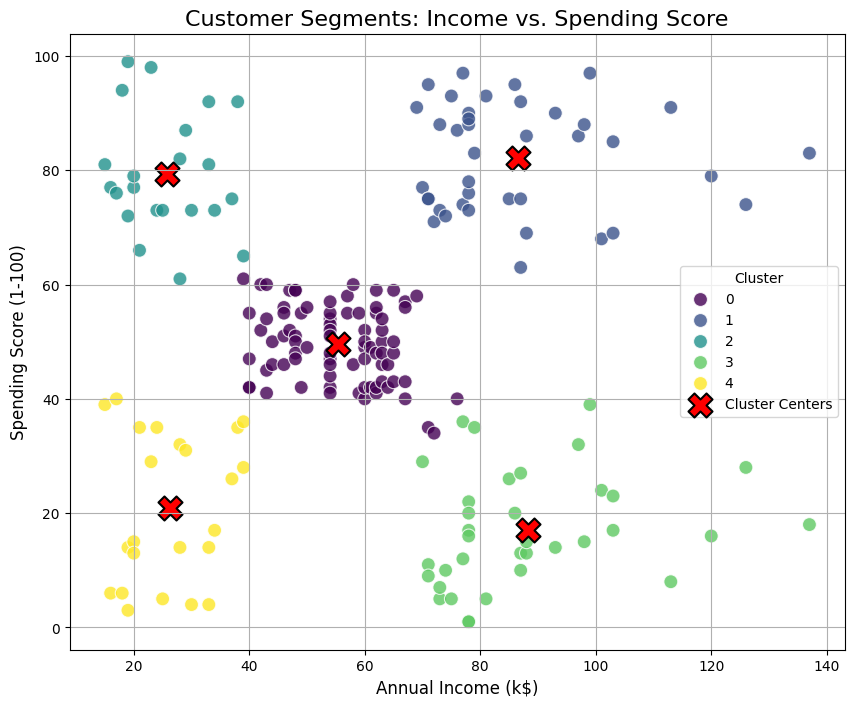


Clusters visualized.
Now, interpret the characteristics of each cluster based on their position on the plot and the cluster centers.


In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df = pd.read_csv('Mall_Customers.csv')
    scaler = StandardScaler()
    X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
    X_scaled_df = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
    optimal_k = 5
    kmeans_model = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
    kmeans_model.fit(X_scaled_df)
    df['Cluster'] = kmeans_model.labels_
    cluster_centers_original_scale = scaler.inverse_transform(kmeans_model.cluster_centers_)
    cluster_centers_df = pd.DataFrame(cluster_centers_original_scale, columns=X.columns)
    cluster_centers_df.index.name = 'Cluster ID'
    print("DataFrame 'df' with clusters and original scale centers reloaded/prepared for operations.")
except FileNotFoundError:
    print("Mall_Customers.csv not found. Please ensure the file is in the correct directory.")
    exit()


plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    data=df,
    palette='viridis',
    s=100,
    alpha=0.8
)

plt.scatter(
    cluster_centers_df['Annual Income (k$)'],
    cluster_centers_df['Spending Score (1-100)'],
    marker='X',
    s=300,
    color='red',
    label='Cluster Centers',
    edgecolors='black',
    linewidth=1.5
)

plt.title('Customer Segments: Income vs. Spending Score', fontsize=16)
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.grid(True)
plt.legend(title='Cluster')
plt.show()

print("\nClusters visualized.")
print("Now, interpret the characteristics of each cluster based on their position on the plot and the cluster centers.")


DataFrame 'df' with K-Means clusters and original scale centers reloaded/prepared for DBSCAN operations.

--- Distribution of customers per DBSCAN cluster ---
DBSCAN_Cluster
-1      8
 0    157
 1     35
Name: count, dtype: int64


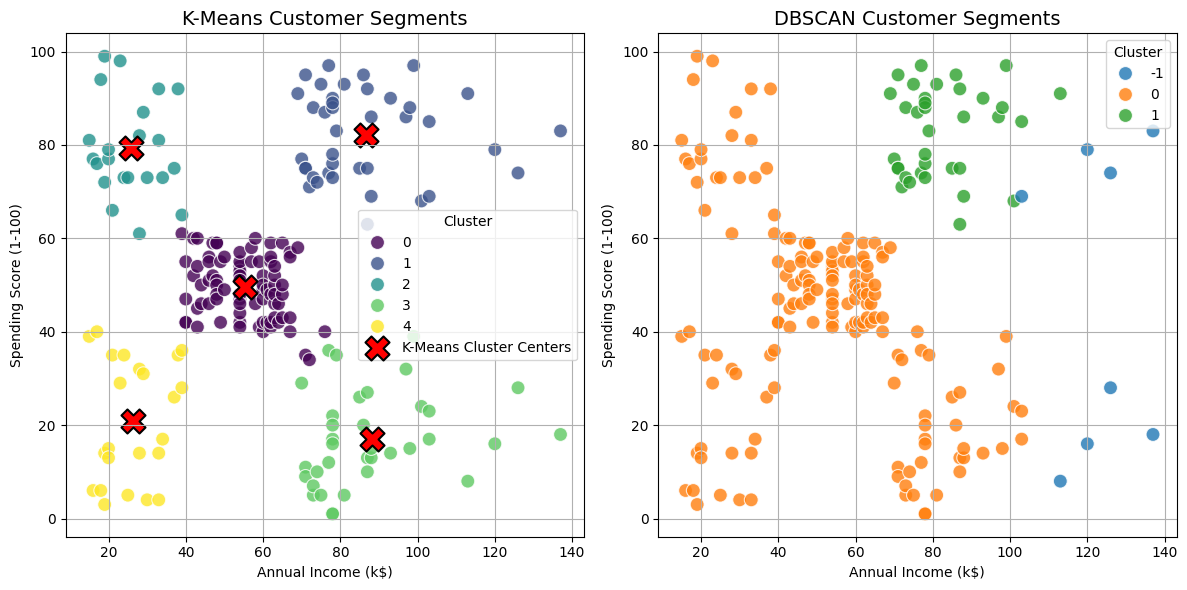


(DBSCAN Clustering) completed and visualized.
Observe how DBSCAN identifies clusters compared to K-Means, including noise points (-1).


In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

try:
    df = pd.read_csv('Mall_Customers.csv')
    scaler = StandardScaler()
    X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
    X_scaled_df = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
    optimal_k = 5
    kmeans_model = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
    kmeans_model.fit(X_scaled_df)
    df['KMeans_Cluster'] = kmeans_model.labels_
    cluster_centers_original_scale = scaler.inverse_transform(kmeans_model.cluster_centers_)
    cluster_centers_df = pd.DataFrame(cluster_centers_original_scale, columns=X.columns)
    cluster_centers_df.index.name = 'Cluster ID'
    print("DataFrame 'df' with K-Means clusters and original scale centers reloaded/prepared for DBSCAN operations.")
except FileNotFoundError:
    print("Mall_Customers.csv not found. Please ensure the file is in the correct directory.")
    exit()

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled_df)
df['DBSCAN_Cluster'] = dbscan_labels

print("\n--- Distribution of customers per DBSCAN cluster ---")
print(df['DBSCAN_Cluster'].value_counts().sort_index())

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='KMeans_Cluster',
    data=df,
    palette='viridis',
    s=100,
    alpha=0.8
)
plt.scatter(
    cluster_centers_df['Annual Income (k$)'],
    cluster_centers_df['Spending Score (1-100)'],
    marker='X',
    s=300,
    color='red',
    label='K-Means Cluster Centers',
    edgecolors='black',
    linewidth=1.5
)
plt.title('K-Means Customer Segments', fontsize=14)
plt.xlabel('Annual Income (k$)', fontsize=10)
plt.ylabel('Spending Score (1-100)', fontsize=10)
plt.grid(True)
plt.legend(title='Cluster')


plt.subplot(1, 2, 2)
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='DBSCAN_Cluster',
    data=df,
    palette='tab10',
    s=100,
    alpha=0.8
)
plt.title('DBSCAN Customer Segments', fontsize=14)
plt.xlabel('Annual Income (k$)', fontsize=10)
plt.ylabel('Spending Score (1-100)', fontsize=10)
plt.grid(True)
plt.legend(title='Cluster')

plt.tight_layout()
plt.show()

print("\n(DBSCAN Clustering) completed and visualized.")
print("Observe how DBSCAN identifies clusters compared to K-Means, including noise points (-1).")


In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df = pd.read_csv('Mall_Customers.csv')
    scaler = StandardScaler()
    X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
    X_scaled_df = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
    optimal_k = 5
    kmeans_model = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
    kmeans_model.fit(X_scaled_df)
    df['KMeans_Cluster'] = kmeans_model.labels_
    print("DataFrame 'df' with K-Means clusters reloaded/prepared for average spending analysis.")
except FileNotFoundError:
    print("Mall_Customers.csv not found. Please ensure the file is in the correct directory.")
    exit()

print("\n--- Average Spending Score per K-Means Cluster ---")
average_spending_per_cluster = df.groupby('KMeans_Cluster')['Spending Score (1-100)'].mean()
print(average_spending_per_cluster)

print("\n(Average Spending Analysis) completed.")
print("This analysis helps to further characterize each customer segment.")


DataFrame 'df' with K-Means clusters reloaded/prepared for average spending analysis.

--- Average Spending Score per K-Means Cluster ---
KMeans_Cluster
0    49.518519
1    82.128205
2    79.363636
3    17.114286
4    20.913043
Name: Spending Score (1-100), dtype: float64

(Average Spending Analysis) completed.
This analysis helps to further characterize each customer segment.
